<h1><center>Un vistazo al problema de Reducción de Dimensiones por medio del Análisis de Componentes Principales </center></h1>
<h2><center>Proyecto Final</center></h2>
<h3><center>Álgebra Matricial</center></h3>

### Luis Díaz Calvo

#### *Diciembre 2022*

**Este trabajo está basado en las siguientes referencias.**

1. [Modern Multivariate
Statistical Techniques](http://weixingsong.weebly.com/uploads/7/4/3/5/7435707/modern_multivariate_analysis.pdf) (capítulo VII).

2. [Linear Algebra and
Matrix Analysis for
Statistics](http://webéducation.com/wp-content/uploads/2018/06/Linear-Algebra-and-Matrix-Analysis-for-Statistics.pdf) (capítulo XII).

3. [Mathematics For Machine Learning](https://mml-book.github.io/book/mml-book.pdf) (capítulo X).

4. [PCA - SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). (Documentación).

5. [PCA with Python](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60). (Tutorial).

### **Motivación**

Analizar datos de alta dimensionalidad (por ejemplo, imágenes) usualmente es complicado. Es difícil interpretarlos, visualizarlos y almacenarlos. En resumen, trabajar con ellos es engorroso. Sin embargo, así como tienen desventajas, también tienen ventajas que podemos utilizar para simplificar el análisis. Una de ellas es que, en general, muchas de estas dimensiones son redundantes en el sentido de que se pueden expresar en términos de combinaciones de otras. De este modo, la dimensión intrínseca de los datos suele ser más baja de lo que se tiene. Una técnica muy común para lidiar con este problema es la **Reducción de Dimensiones**. Esta estrategia consiste en reducir la dimensionalidad por medio del análisis de las correlaciones entre los datos de modo que la pérdida de información es casi nula. En otras palabras, se aprovecha el hecho de que un conjunto se alta dimensionalidad se puede llevar a un subespacio de dimensionalidad más baja. Una método popular en el paradigma de la Reducción de Dimensiones es el **Análisis de Componentes Principales** (_Principal Component Analysis_ o PCA en inglés). Esta técnica propuesta por Pearson y Hotelling se puede pensar como una _compresión_ de los datos y se basa en encontrar proyecciones de los datos originales tales que la variabilidad de los mismos se preserve o no cambie mucho. 

La siguiente figura ilustra el método PCA. Es un conjunto de datos en 3 dimensiones pero no varian mucho sobre el plano mostrado. Por ende, se puede aplicar PCA para proyectar los datos a un subespacio de dos dimensiones. En este caso PC1 es la componente principal con máxima variabilidad y pc2 es la segunda. 

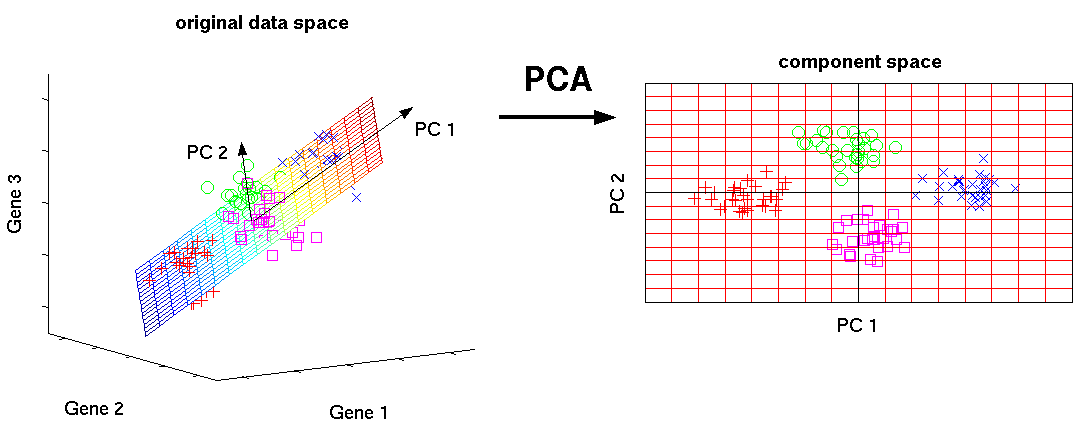

In [3]:
from IPython import display
display.Image("http://www.nlpca.org/fig_pca_principal_component_analysis.png")

A continuación expondré el problema general de forma analítica y elaboraré sobre un par de soluciones.

### **Presentación del Problema**

 Supongamos una nuestra muestra de vectores aleatorios $\mathbf{X} = (X_1, \ldots, X_r)^T \in \mathbb{R}^{r}$ con media $ \boldsymbol{\mu} \in \mathbb{R}^{r}$ y matriz de covarianza $ \boldsymbol{\Sigma}_{XX}\in \mathbb{R}^{r \times r}$. PCA lo que busca es reemplazar el conjunto de $r$ variables $X_1, \ldots, X_r$ (desordenadas y correlacionadas) por un conjunto de $t<r$ proyecciones de las variables originales $\psi_1, \ldots, \psi_t$ (ordenadas y no correlacionadas) dadas por

\begin{equation}
\psi_j = \mathbf{b}^{T}_{j} X = b_{j1}X_1 + \ldots + b_{jr}X_r \,, \hspace{1cm}j=1,2,\ldots, t\,.
\end{equation}

Aquí los vectores $\mathbf{b}_j$ se denominan los pesos de la proyección lineal. Estas proyecciones son tales que minimizan la pérdida de información. En este contexto, la información se interpreta como la variación total de las variables originales

\begin{equation}
\sum_{i=1}^{r} \text{Var}\left[X_j \right] = \text{tr}\left( \Sigma_{XX} \right) \,.
\end{equation}

Los elección de los pesos $\mathbf{b}_j$, $j=1,2,\ldots, t$ es tal que se cumple lo siguiente.

1. Las $t$ proyecciones lineales $\psi_j$ de $X$ se ordenan por medio de sus varianzas, es decir 

\begin{equation}
\text{Var} \left[ \psi_1 \right] \geq \text{Var} \left[ \psi_2 \right] \geq  \ldots \geq  \text{Var} \left[ \psi_t\right] \,.
\end{equation}

2. La componente $j$-ésima $\psi_j$ no está correlacionada con una proyección anterior $\psi_k$, i.e.

$$\text{Cov}[\psi_k, \psi_j] = 0 \,, \hspace{1cm}\forall k < j\,.$$

Estas $t$ componentes se conocen como las primeras $t$ componentes principales de $X$. Hay dos derivaciones populares para encontrar dichas componentes. Una se basa por medio del criterio de optimalidad en mínimos cuadrados y la otra es por la técnica de maximización de la varianza. 

En los siguientes dos bloques mencionaré las ideas principales de cada método.

### **Enfoque por Optimalidad de Mínimos Cuadrados**

Sea $\mathbf{B}^{(t)} = (\mathbf{b}_1, \ldots, \mathbf{b}_t )^T \in \mathbb{R}^{t \times r}$ la matriz que almacena los pesos $\mathbf{b}_j$ de modo que las proyecciones están almacenadas en el vector $\boldsymbol{\psi} = \mathbf{B}^{(t)} \mathbf{X}$ tal que $ \boldsymbol{\psi} = (\psi_1, \ldots, \psi_t)^T$. Lo que se busca es un vector $ \boldsymbol{\mu}^{(t)} \in \mathbb{R}^{r}$ y una matriz $ \mathbf{A}^{(t)} \in \mathbb{R}^{r\times t}$ tales que $\mathbf{X} \approx \boldsymbol{\mu}^{(t)}  + \mathbf{A}^{(t)} \boldsymbol{\psi}$. El criterio de mínimos cuadrados en este caso se basa en encontrar $\mathbf{B}^{(t)}$, $\mathbf{A}^{(t)}$ y $\boldsymbol{\mu}^{(t)}$ tales que minimizan

\begin{equation}
\label{eq:1}
\begin{split}
\hspace{4cm}\mathbb{E} \left[ (\mathbf{X} - \boldsymbol{\mu}^{(t)} - \mathbf{A}^{(t)} \boldsymbol{\psi})^T  (\mathbf{X} - \boldsymbol{\mu}^{(t)} - \mathbf{A}^{(t)} \boldsymbol{\psi}) \right] = \mathbb{E} \left[ (\mathbf{X} - \boldsymbol{\mu}^{(t)} - \mathbf{A}^{(t)}\mathbf{B}^{(t)}  \mathbf{X} )^T  (\mathbf{X} - \boldsymbol{\mu} - \mathbf{A}^{(t)} \mathbf{B}^{(t)} \mathbf{X} ) \right] \,. \hspace{4cm}(1)
\end{split}
\end{equation}

Es posible dar la solución a este problema en términos de los valores y vectores propios de la matriz $\Sigma_{XX}$. Digamos que $\lambda_1, \ldots, \lambda_r$ son los valores propios tales que $\lambda_1 \geq \ldots \geq \lambda_r$ y digamos que $\mathbf{v}_1, ,\ldots,  \mathbf{v}_r$ son los vectores propios asociados a los valores propios en ese orden. Por tanto, es posible mostrar que 

\begin{equation}
\begin{split}
\mathbf{A}^{(t)} &= (\mathbf{v}_1, \ldots, \mathbf{v}_t ) \,, \\
\mathbf{B}^{(t)} &= (\mathbf{v}_1, \ldots, \mathbf{v}_t )^{T} \,, \\
\boldsymbol{\mu}^{(t)} &=  (\mathbf{I}_r - \mathbf{A}^{(t)} \mathbf{B}^{(t)} ) \boldsymbol{\mu } \,. 
\end{split}
\end{equation}

De igual forma, es posible mostrar que el valor mínimo de (1) es $\displaystyle \sum_{j=t+1}^{r} \lambda_{j}$. Por tanto, las primeras $t$ componentes principales de $\mathbf{X}$ están dadas por las proyecciones lineales $\psi_{1}, \ldots, \psi_{t}$ dadas por

\begin{equation}
\psi_j = \mathbf{v}^{T}_{j} \mathbf{X} \,, \hspace{1cm}j=1,2,\ldots, t\,.
\end{equation}

Luego, la covarianza entre $\psi_i$ y $\psi_j$ está dada por

\begin{equation}
\text{Cov}\left[ \psi_i, \psi_j \right] = \text{Cov}\left[ \mathbf{v}^{T}_{i} \mathbf{X} ,  \mathbf{v}^{T}_{j} \mathbf{X} \right] =  \mathbf{v}^{T}_{i} \boldsymbol{\Sigma}_{XX} \mathbf{v}_{j} = \lambda_{j} \mathbf{v}^{T}_{i} \mathbf{v}_{j} = \delta_{ij} \lambda_{j} \,.
\end{equation}

Aquí $ \delta_{ij}$ es la delta de Kronecker. Por definición de varianza $\text{Var}\left[ \psi_i \right] = \text{Cov}\left[ \psi_i, \psi_i \right] = \lambda_i$. Claramente $\text{Var}\left[ \psi_1 \right] \geq \ldots \geq\text{Var}\left[ \psi_t \right]$. De igual forma $\text{Cov}\left[ \psi_i, \psi_j \right] = 0$ si $i\neq j$. Esto es lo que pedíamos para las proyecciones, que estuvieran ordenadas y no estuvieran correlacionadas.

### **Enfoque por Maximización de la Varianza**

En la derivación original del método PCA (hecha por Hotelling), los coeficiones de los vectores de proyección 

\begin{equation}
\mathbf{b}_j = (b_{j1}, \ldots, b_{jr})^{T} \in \mathbb{R}^{r} \,, \hspace{1cm}j=1,\ldots, t \,,
\end{equation}

se eligen de forma secuencial tal que las varianzas $\text{Var}[\psi_j] = \mathbf{b}^T_{j} \boldsymbol{\Sigma}_{XX} \mathbf{b}_j$ están arregladas en orden descendente, sujetas a la normalización $\mathbf{b}^T_{j} \mathbf{b}_{j} =1$ y no correlacionadas con las proyecciones previas. i.e. $\text{Cov} \left[ \psi_i, \psi_j \right] = \mathbf{b}^T_{j}  \boldsymbol{\Sigma}_{XX} \mathbf{b}_{j} = 0 $ para $i<j$. En este contexto, la primera componente principal, $\psi_1$ se obtiene eligiendo $r$ coefficientes de $\mathbf{b}_1$ tal que optimizan la función 

\begin{equation}
f(\mathbf{b}_1) = \mathbf{b}^T_1 \boldsymbol{\Sigma}_{XX} \mathbf{b}_1 - \eta_1 (1 - \mathbf{b}^T_1 \mathbf{b}_1) \,,
\end{equation}

Aquí $\eta_1$ es un multiplicador de Lagrange. Derivando esta expresión encontramos que

\begin{equation}
\dfrac{\partial }{\partial \mathbf{b}_1} f(\mathbf{b}_1) = 2 (\boldsymbol{\Sigma}_{XX} - \eta_1 \mathbf{I}_{r})\mathbf{b}_1 = \mathbf{0} \,.
\end{equation}

Si $\mathbf{b}_1 \neq \mathbf{0}$, entonces el multplicador se elige tal que $|\boldsymbol{\Sigma}_{XX}  - \eta_{1} \mathbf{I}_{r} | = 0$. Por ende, $\eta_1$ debe ser el eigenvalor más grande $\boldsymbol{\Sigma}_{XX}$ y $\mathbf{b}_1$ el vector propio asociado a $\eta_1$. Luego, para $\psi_2$ se añade la reestricción $\mathbf{b}^T_1 \mathbf{b}_2 = 0$ de modo que la función a optimizar es

\begin{equation}
f(\mathbf{b}_2) = \mathbf{b}^T_2 \boldsymbol{\Sigma}_{XX} \mathbf{b}_2 - \eta_2(1 - \mathbf{b}^T_2 \mathbf{b}_2)+ \phi \mathbf{b}^T_1 \mathbf{b}_2 \,,
\end{equation}

con $\eta_2$ y $\phi$ multiplicadores de Lagrange. Derivando, obtenemos

\begin{equation}
\dfrac{\partial }{\partial \mathbf{b}_2} f(\mathbf{b}_2) = 2 (\boldsymbol{\Sigma}_{XX} - \eta_2 \mathbf{I}_{r})\mathbf{b}_2 + \phi \mathbf{b}_1  = \mathbf{0}  \,.
\end{equation}

Luego, haciendo un producto interno por $\mathbf{b}^T_1$ y usando la ortonormalidad, vemos que $2 \mathbf{b}^T_1\boldsymbol{\Sigma}_{XX}  \mathbf{b}_2 + \phi =0 $. Nuevamente por ortonormalidad, multiplicar $\mathbf{b}^T_2$ y $2 (\boldsymbol{\Sigma}_{XX} - \eta_1 \mathbf{I}_{r})\mathbf{b}_1 =\mathbf{0}$ implica que $\mathbf{b}^T_2 \boldsymbol{\Sigma}_{XX} \mathbf{b}_1 = 0$. Por tanto $\phi = 0$ y $\lambda_2$ es el segundo valor propio más grande de $\boldsymbol{\Sigma}_{XX}$. Por tanto $\mathbf{b}_2$ es el vector propio asociado a $\lambda_2$.

Las siguientes componentes se obtienen de forma análoga pero tomando en cuenta que los vectores base deben ser ortogonales. Con esto, se muestra que los vectores $\mathbf{b}_j$ coinciden con los vectores propios asociados a los valores propios de la matriz de covarianza ordenados de mayor a menor.

Esta solución coincide con la del método de mínimos cuadrados y sabemos que dicha solución nos da proyecciones ordenadas (en términos de varianza) y no correlacionadas.

### **Sobre la covarianza muestral y la descomposición por valores sigulares**

En la práctica, no conocemos a priori la matriz $\boldsymbol{\Sigma}_{XX}$ por lo que empleamos la matriz de covarianza muestral dada por

\begin{equation}
\mathbf{S} = \dfrac{1}{N} \sum_{i=1}^{N} \mathbf{X}_{i} \mathbf{X}^T_i = \dfrac{1}{N} \mathcal{X}\mathcal{X}^T \in \mathbb{R}^{r\times r} \,,
\end{equation}

con $\mathcal{X} = (\mathbf{X}_{1}, \ldots, \mathbf{X}_{N}) \in \mathbb{R}^{r\times N}$ una matriz con $N$ vectores aleatorios (muestras). Calcular los valores y vectores propios de esta matriz puede ser complicado para datos de altas dimensiones por que que se usa una descomposición en valores sigulares (DVS) para simplificar el proceso. En concreto, como $\mathbf{S}$ es simétrica, y factoriza en $\mathcal{X}\mathcal{X}^T$, los valores propios de $\mathbf{S}$ son los valores sigulares cuadráticos de  $\mathcal{X}\mathcal{X}^T$. Para ser más claros, como, la DVS de $\mathcal{X}$ es

\begin{equation}
\mathcal{X} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \,,
\end{equation}

donde $ \mathbf{U} \in \mathbb{R}^{r\times r}$ (cuyas columnas son los vectores propios de $\mathcal{X}\mathcal{X}^T$)y $\mathbf{V}\in \mathbb{R}^{N \times N}$ son matrices ortogonales y $ \boldsymbol{\Sigma} \in \mathbb{R}^{r\times N }$  es la matriz cuyas entradas diferentes de cero son los valores singulares $\sigma_{ii} \geq 0$. Por tanto

\begin{equation}
\begin{split}
\mathbf{S} & =  \dfrac{1}{N} \mathcal{X}\mathcal{X}^T = \dfrac{1}{N}  \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \left(  \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \right)^T \\
& =  \dfrac{1}{N}  \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T  \mathbf{V} \boldsymbol{\Sigma}^T \mathbf{U}^T =  \dfrac{1}{N}  \mathbf{U} \boldsymbol{\Sigma} \boldsymbol{\Sigma}^T \mathbf{U} \,.
\end{split}
\end{equation}

De aquí se obtiene la conexión entre los valores propios $\lambda_d$ de $\mathbf{S}$ y los valores singulares de $\mathbf{X}$

\begin{equation}
\lambda_d = \dfrac{1}{N}\sigma^2_d \,.
\end{equation}

Más aún, se observa que el enfoque de máxima varianza esta directamente relacionada con la DVS.


### **La relevancia del método PCA en el curso**

El método PCA es bastante relevante para el curso porque en esta técnica convergen muchos conceptos y herramientas usados durante el semestre. Para empezar, la construcción de las proyecciones implica el uso de combinaciones lineales, producto interno y proyección sobre subespacios vectoriales generados por bases ortonormales. También implica el dominio del concepto de valores y vectores propios en el método de máxima varianza. Computacionalmente está fuertemente basado en el uso de la Factorización en Valores Singulares, pues por este medio se calcular los valores y vectores propios de la matriz de covarianza muestral.  

También implica una conexión con el curso de Inferencia Estadística porque se usan los conceptos de variables y vectores aleatorios, valores esperados, y matriz de covarianza. Considero que este tema representa muy bien lo que vimos durante el curso.


### **PCA en Python usando SciKit Learn**

Como mencioné antes, PCA es muy útil para visualizar y analizar datos de alta dimensionalidad. La librería SciKit Learn de Python incluye el método PCA basado en la Descomposición de Valores Singulares (que discutí arriba). La documentación la cite al inicio del notebook. Para poner en práctica la librería usaré la base de datos [MNIST](http://yann.lecun.com/exdb/mnist/). Consta de dos conjuntos de imágenes de números de $28 \times 28$ píxeles (un conjunto de entrenamiento y otro de prueba, solo usaré el de entrenamiento, que es el más grande). Reduciré dimensiones para visualizar las imágenes y exploraré la proyección de las imágenes después de reducir dimensiones.

In [4]:
#Cargamos las librerías necesarias para correr las funciones
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

Importamos los datos. En este caso, solo trabajaré con el conjunto de entrenamiento. Nótese que el archivo `.csv` está contenido en la misma carpeta y por ello es posible usarlo. 

In [5]:
train = pd.read_csv('train.csv')

In [6]:
print('Dimensiones del conjunto train: {}'.format(train.shape))

Dimensiones del conjunto train: (42000, 785)


Tenemos 42000 imágenes de $28\times28 =784$ píxeles. Mostramos los valores de los primeros 5 registros.

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ahora extraemos la matriz con los pixeles correspondientes a cada images. La columna label (son etiquetas para cada imágen) la ignoramos de momento.

In [8]:
label = train.loc[:,'label'].values
images = train.loc[:,'pixel0':].values
print('Dimensiones del conjunto Images: {}'.format(images.shape))

Dimensiones del conjunto Images: (42000, 784)


Visualizamos algunas figuras. La siguiente función grafica las primeras 100 muestras. 

In [9]:
def visualization(data):
    fig, axes = plt.subplots(10,10,figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28), cmap='binary', interpolation='nearest',clim=(0, 16))

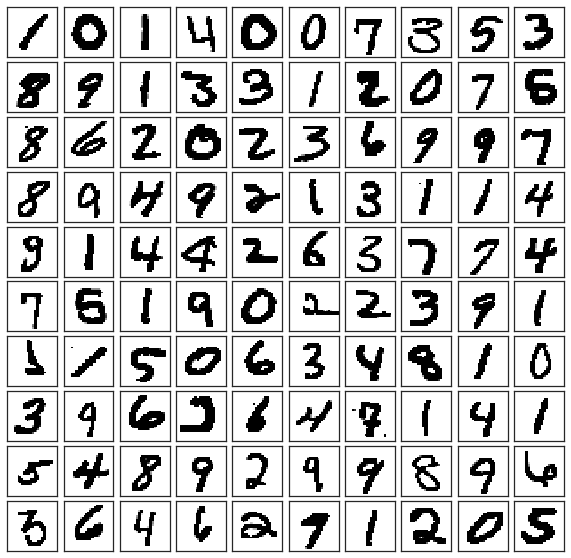

In [10]:
visualization(images)

In [11]:
#Aquí aplicamos el método PCA
from sklearn.decomposition import PCA
#Pedimos que el número de componentes principales sean 2
pca2 = PCA(n_components=2)
#Las proyecciones se guardan en el siguiente arreglo
prcp = pca2.fit_transform(images)
prcp_df = pd.DataFrame(data = prcp, columns = ['pc1', 'pc2'])

In [12]:
print('Dimensiones del conjunto Componentes Principales: {}'.format(prcp_df.shape))

Dimensiones del conjunto Componentes Principales: (42000, 2)


Seguimos teniendo 42000 pero reducimos el número de píxeles (componentes principales) a dos. Podemos consultar la varianza de cada componente.

In [13]:
print('Varianza por Componente Principal: {}'.format(pca2.explained_variance_))

Varianza por Componente Principal: [334780.59149037 245885.06427864]


Ahora visualizamos toda la muestra (y no solo 100 como lo hicimos arriba) por medio de las dos componentes principales. 

Text(0, 0.5, 'Segunda Componente Principal')

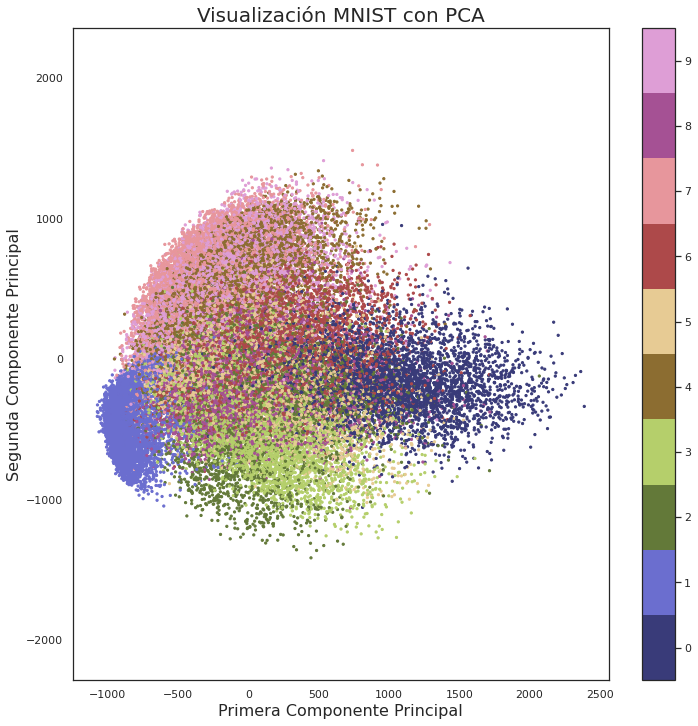

In [14]:
plt.figure(figsize=(12, 12))
#Eje horizontal, primera componente de máxima varianza
#Ejer vertical, segunda componente de máxima varianza
plt.scatter(prcp[:, 0], prcp[:, 1], s= 5, c= label, cmap='tab20b')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualización MNIST con PCA', fontsize=20)
plt.xlabel('Primera Componente Principal', fontsize=16)
plt.ylabel('Segunda Componente Principal', fontsize=16)

Ahora hacemos lo mismo pero con 3 componentes principales.

In [15]:
#PCA con 3 componentes principales
pca3 = PCA(n_components=3)
#Las proyecciones se guardan en el siguiente arreglo
prcp_ = pca3.fit_transform(images)
prcp_df_ = pd.DataFrame(data = prcp_, columns = ['pc1', 'pc2', 'pc3'])

In [16]:
print('Dimensiones del conjunto Componentes Principales: {}'.format(prcp_df_.shape))

Dimensiones del conjunto Componentes Principales: (42000, 3)


In [17]:
print('Varianza por Componente Principal: {}'.format(pca3.explained_variance_))

Varianza por Componente Principal: [334780.59149397 245885.06496996 211051.62600801]


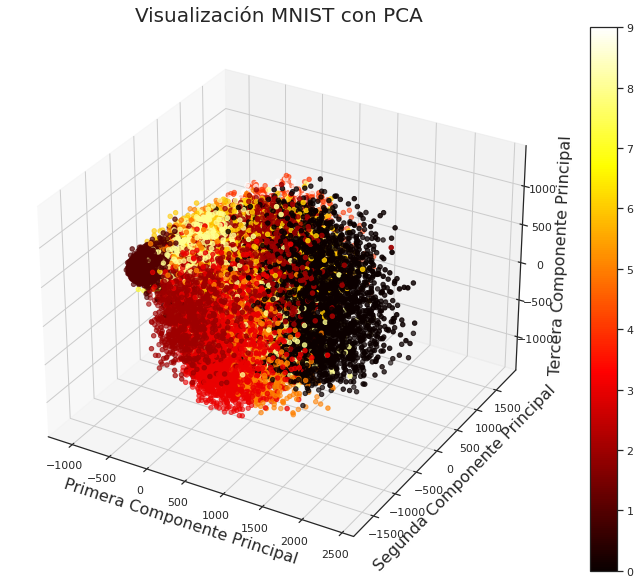

In [18]:
#Ahora hacemos la visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#Eje x, primera componente de máxima varianza
#Ejer y, segunda componente de máxima varianza
#Ejer z, tercera componente de máxima varianza
s=ax.scatter(prcp_[:, 0], prcp_[:, 1], prcp_[:, 2], marker='o', c=label, cmap=plt.get_cmap("hot"))
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualización MNIST con PCA', fontsize=20)
ax.set_xlabel('Primera Componente Principal', fontsize=16)
ax.set_ylabel('Segunda Componente Principal', fontsize=16)
ax.set_zlabel('Tercera Componente Principal', fontsize=16)
fig.colorbar(s, ax=ax)

También podemos preguntarnos como se ven los datos originales después de aplicar PCA. Para ello aplicamos la transformación inversa a las proyecciones obtenidas usando la función `inverse_transform` de PCA. Primero obtenemos una 'remuestreamos' las imágenes añadiendo ruido. Esto no es necesario pero sirve para checar que también funciona la transformación inversa para recuperar las imágenes originales. Para ello tomamos una muestra 'normal' de cada pixel con media el valor del pixel y varianza, digamos 10.

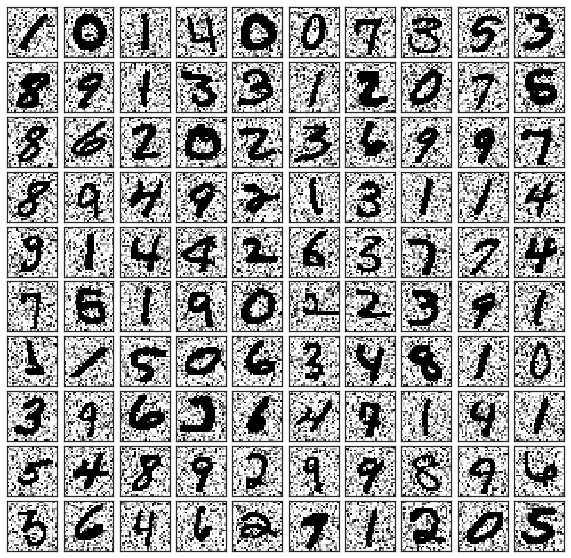

In [19]:
np.random.seed(100)
images_normal_sample = np.random.normal(images, 10)
#Vemos como se ven las primeras 100 figuras con ruido
visualization(images_normal_sample)

Ahora reducimos dimensiones del muestra pero exigimos que se preserve el 80\% de la varianza de los datos.

In [20]:
#Ratio de varianza a preservar
pres_var = 0.80
new_pca = PCA(pres_var)
#Aplicamos la transformación inversa
new_prcp = new_pca.fit_transform(images_normal_sample)
new_prcp_df = pd.DataFrame(data = new_prcp)
print('Dimensiones del conjunto Componentes Principales: {}'.format(new_pca.n_components_))

Dimensiones del conjunto Componentes Principales: 48


Podemos volver a visualizar las primeras dos o tres componentes principales aunque aquí perdemos información ya que el total de componetes principales ahora son 48 y no 2 o 3.

Text(0, 0.5, 'Segunda Componente Principal')

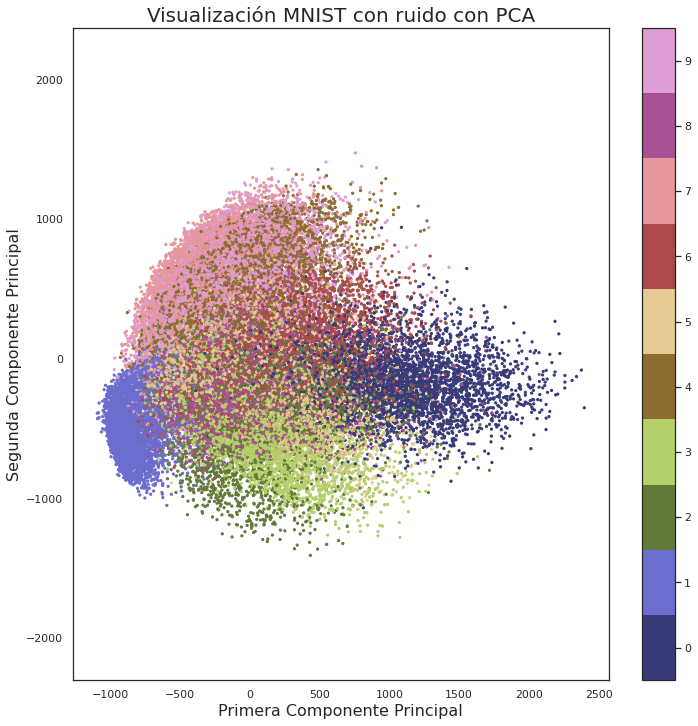

In [21]:
plt.figure(figsize=(12, 12))
#Eje horizontal, primera componente de máxima varianza
#Ejer vertical, segunda componente de máxima varianza
plt.scatter(new_prcp[:, 0], new_prcp[:, 1], s= 5, c= label, cmap='tab20b')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualización MNIST con ruido con PCA', fontsize=20)
plt.xlabel('Primera Componente Principal', fontsize=16)
plt.ylabel('Segunda Componente Principal', fontsize=16)

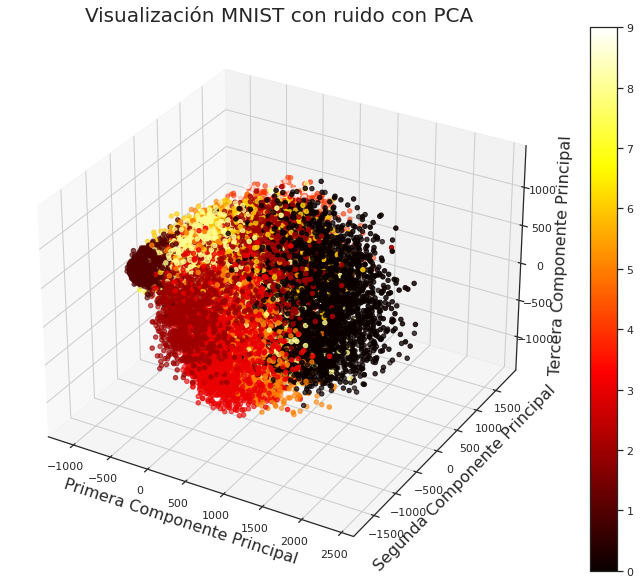

In [22]:
#Ahora hacemos la visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#Eje x, primera componente de máxima varianza
#Ejer y, segunda componente de máxima varianza
#Ejer z, tercera componente de máxima varianza
s=ax.scatter(new_prcp[:, 0], new_prcp[:, 1], new_prcp[:, 2], marker='o', c=label, cmap=plt.get_cmap("hot"))
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualización MNIST con ruido con PCA', fontsize=20)
ax.set_xlabel('Primera Componente Principal', fontsize=16)
ax.set_ylabel('Segunda Componente Principal', fontsize=16)
ax.set_zlabel('Tercera Componente Principal', fontsize=16)
fig.colorbar(s, ax=ax)

Ahora transformamos los datos de vuelta a su dimensión original usando la función que comenté. Luego mostramos otra vez las primeras 100 figuras.

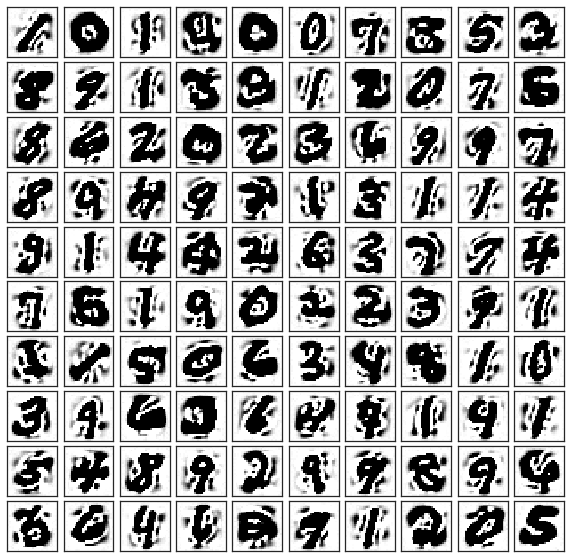

In [23]:
#Nuevo conjunto de imágenes a partir del conjunto de componentes principales
images_new = new_pca.inverse_transform(new_prcp)
#Graficamos las primeras 100 figuras
visualization(images_new)

Todavía se logran distinguir los números. Esto es porque pedimos que se preserve el 80\% de la varianza.

¿Cual es el mejor porcentaje de varianza a preservar? De acuerdo con la documentación, lo usual es elegir el número de dimensiones que se suman a una porción suficientemente grande de la varianza (por ejemplo, 90%). Sin embargo, si el objetivo es visualizar el conjunto de datos en total (como lo hice al principio), debemos elegir de 2 o 3 dimensiones (para no perder información). Podemos graficar la varianza en función del número de componentes principales.

Text(0, 0.5, 'Proporción de Varianza Acumulada')

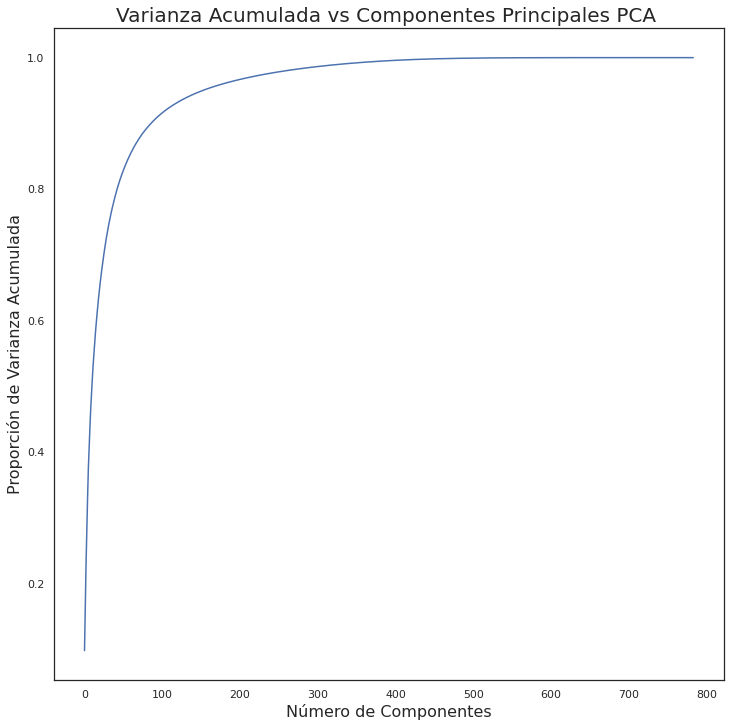

In [24]:
#Ajustamos PCA al conjunto de imágenes
pcax = PCA().fit(images)
plt.figure(figsize=(12, 12))
#Graficamos el ratio de la variabilidad respecto al número de componentes
plt.plot(np.cumsum(pcax.explained_variance_ratio_))
plt.title('Varianza Acumulada vs Componentes Principales PCA ', fontsize=20);
plt.xlabel('Número de Componentes',  fontsize=16)
plt.ylabel('Proporción de Varianza Acumulada',  fontsize=16)

Vemos que el ratio de la variabilidad tiene a 1 conforme el número de componentes principales se acerca al número de muestras (figuras), lo cual tiene sentido por toda la discusión que hemos venido desarrollando. 

### **Conclusiones**

En este notebook se presentó el problema de Reducción de Dimensiones a través del método de Análisis de Componentes Principales (PCA). Básicamente consiste en proyectar (o comprimir) conjuntos de alta dimensionalidad desordenados y correlacionados sobre subespacios de dimensiones más bajas, de forma que las proyecciones están ordenadas y no correlacionadas. De igual forma, las proyecciones buscan preservar la mayor cantidad de varianza posible, de forma que no pierde información de los datos originales. 

Se presentó una aplicación de PCA a un conjunto de imágenes usando la función PCA de la libería Sci-Kit Learn de Python. Dicha función está basada en descomposición de valores singulares. Se visualizaron las imágenes por medios de sus dos y tres primeras componentes principales. También se obtuvieron ejecutó la transformación inversa a las proyecciones de modo que obtuvimos nuevamente el conjunto de figuras a partir del conjunto evaluado con PCA (tal que se preservó el 80\% de variabilidad).

En este método convergen muchas técnicas y conceptos vistos durante el semestre por lo que el tema es relavante para la materia. 

Un posible trabajo futuro con esta técnica sería comparar el desempeño de un modelo de Machine Learning (digamos, una red neuronal) con un conjunto de datos con y sin PCA y ver si la precisión de las predicciones mejora, se mantiene o empeora.